In [19]:
# pip install opencv-python
pip install numpy 
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.5 MB/s eta 0:00:0031m65.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.9 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 57.3 MB/s eta 0:00:0031m70.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 15.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Image loaded successfully.
(500, 500)
(894, 894, 3)
(500, 500, 3)


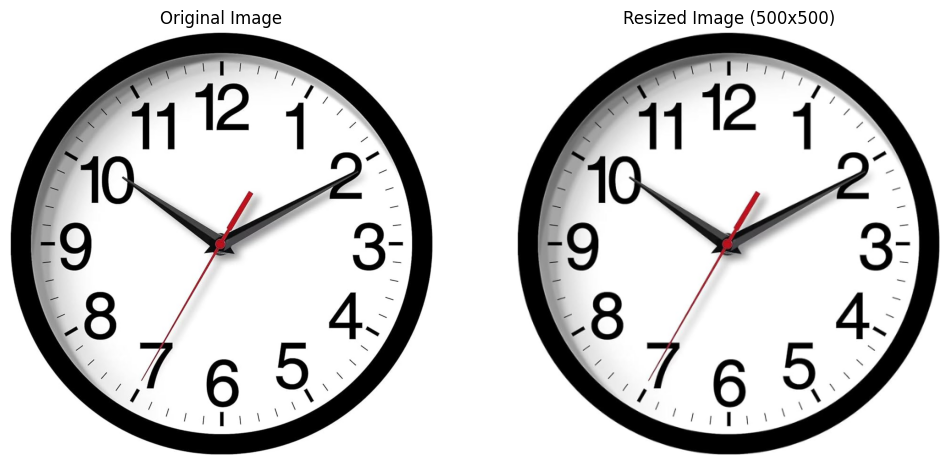

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Replace 'clock.jpg' with the path to your clock image
image_path = 'clock_image3.jpg'
img = cv2.imread(image_path)

if img is None:
    print("Error: Could not read image.")
else:
    print("Image loaded successfully.")

    # Resize the image to a desired size, e.g., (500, 500)
    target_size = (int(img.shape[1]/img.shape[0] *500),500)  # You can adjust this as needed
    print(target_size)
    print(img.shape)
    img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
    print(img_resized.shape)
    # Display the original and resized images for comparison
    plt.figure(figsize=(12, 6))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Plot resized image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title('Resized Image (500x500)')
    plt.axis('off')

    plt.show()

    # Now, proceed with the resized image for further calculations
    img = img_resized  # Use the resized image for further processing


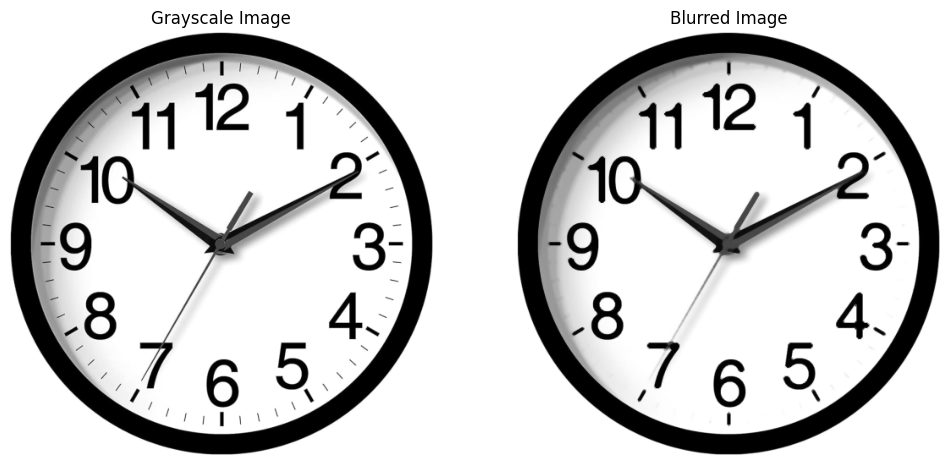

In [90]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply median blur
gray_blurred = cv2.medianBlur(gray, 5)

# Display the grayscale and blurred images
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')

axes[1].imshow(gray_blurred, cmap='gray')
axes[1].set_title('Blurred Image')
axes[1].axis('off')

plt.show()


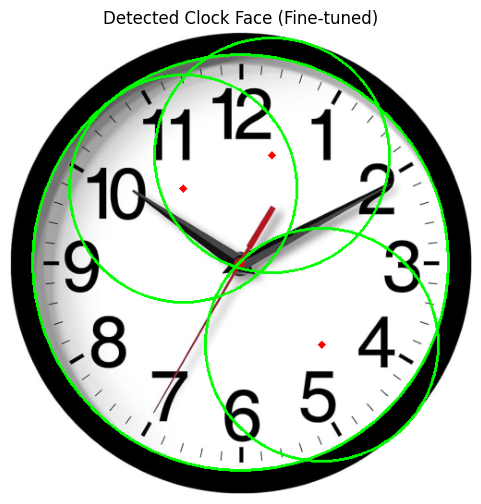

In [91]:
# Modify the HoughCircles call with more appropriate parameters
circles = cv2.HoughCircles(
    gray_blurred, cv2.HOUGH_GRADIENT, dp=1.2, 
    minDist=100, param1=50, param2=80,
    minRadius=30, maxRadius=400  
)

if circles is not None:
    # Get the (x, y, r) as integers
    circles = np.uint16(np.around(circles))
    img_circle = img.copy()
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(img_circle, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(img_circle, (i[0], i[1]), 2, (0, 0, 255), 3)
    
    # Display the image with detected circle
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_circle, cv2.COLOR_BGR2RGB))
    plt.title('Detected Clock Face (Fine-tuned)')
    plt.axis('off')
    plt.show()
else:
    print("No clock face detected.")


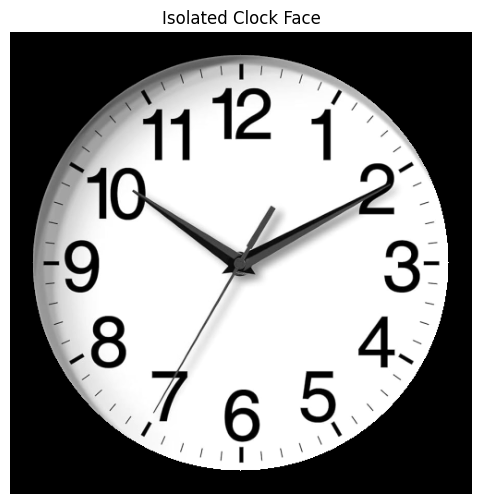

In [92]:
if circles is not None:
    # Get the (x, y, r) as integers
    x, y, r = circles[0][0]

    # Create a mask with the same dimensions as the image
    mask = np.zeros_like(gray)
    cv2.circle(mask, (x, y), r, 255, -1)

    # Apply the mask to isolate the clock face
    clock_face = cv2.bitwise_and(gray, gray, mask=mask)

    # Display the isolated clock face
    plt.figure(figsize=(6,6))
    plt.imshow(clock_face, cmap='gray')
    plt.title('Isolated Clock Face')
    plt.axis('off')
    plt.show()
else:
    print("Cannot proceed without detecting the clock face.")


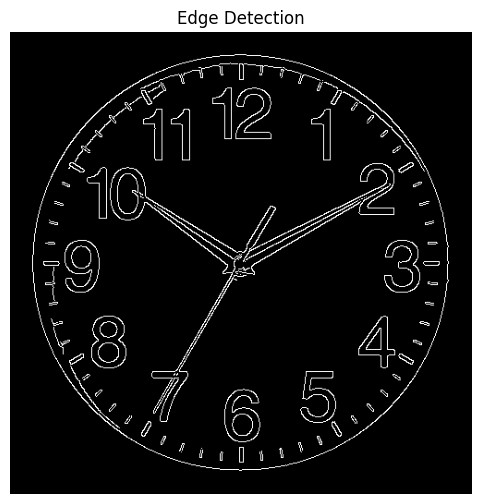

In [93]:
# Apply Canny edge detector
edges = cv2.Canny(clock_face, 50, 150, apertureSize=3)

# Display the edges
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()


17 lines detected.


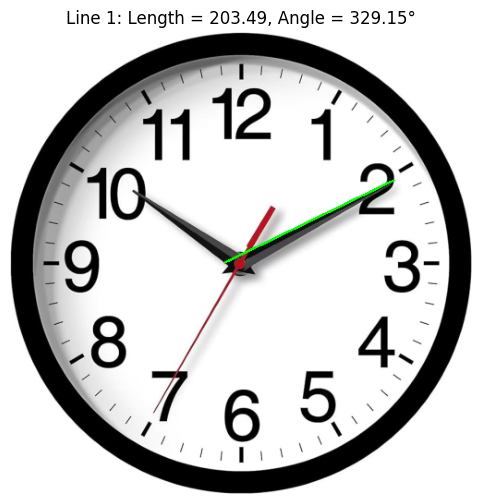

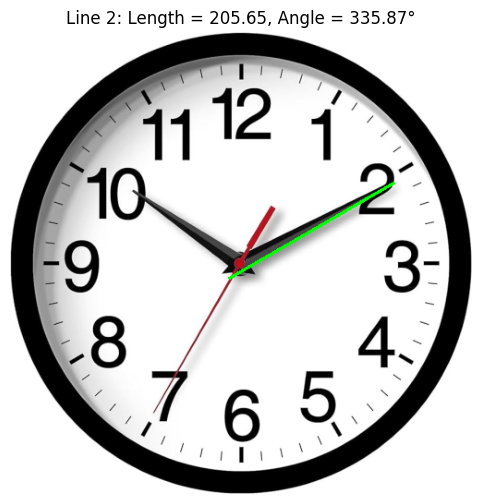

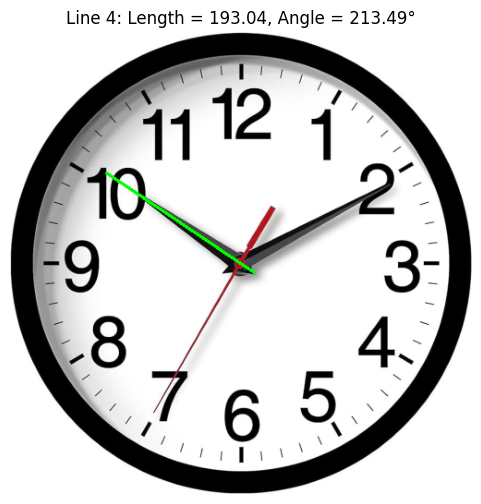

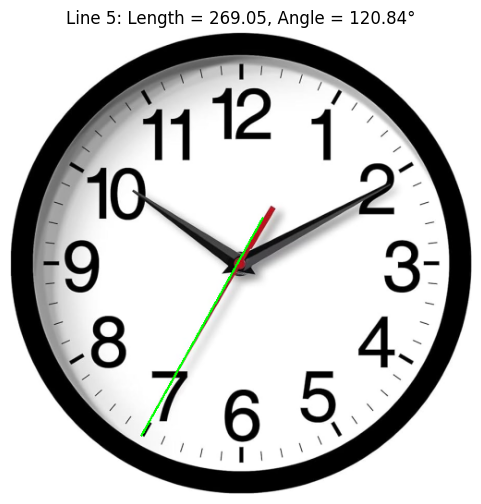

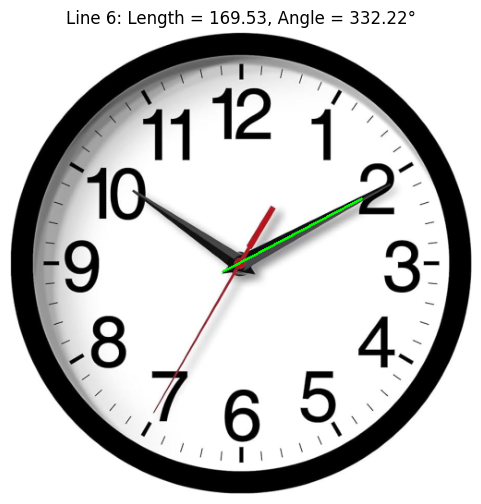

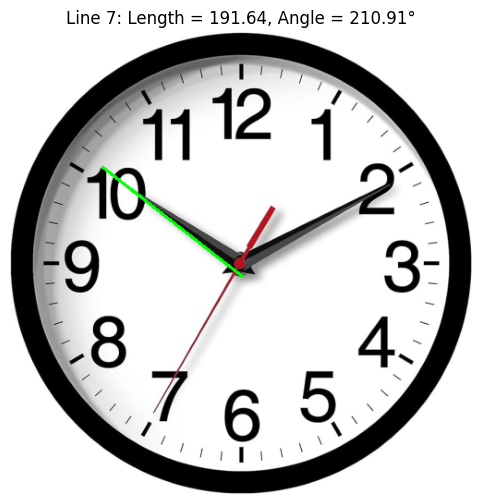

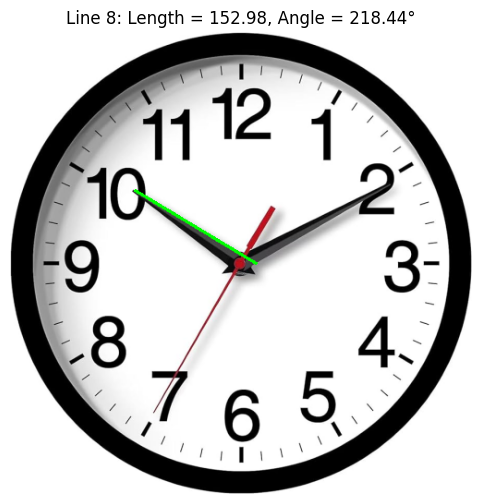

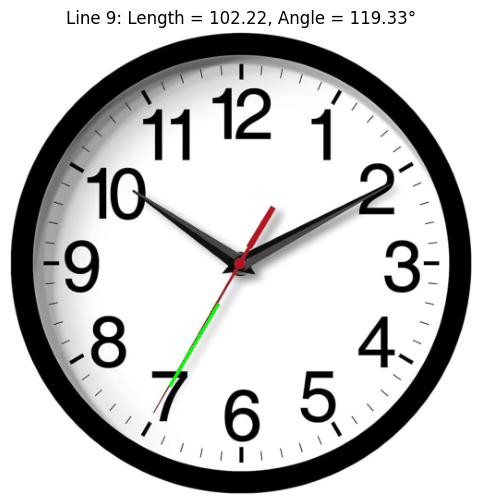

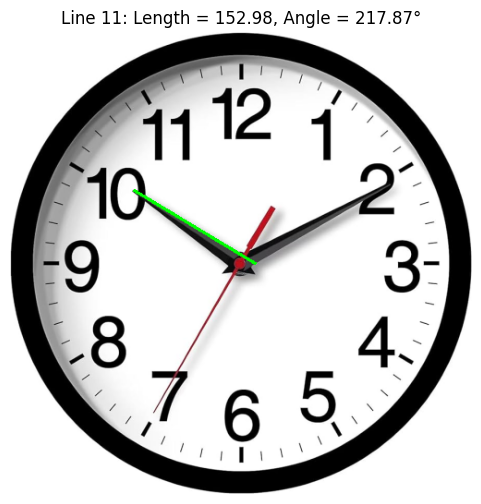

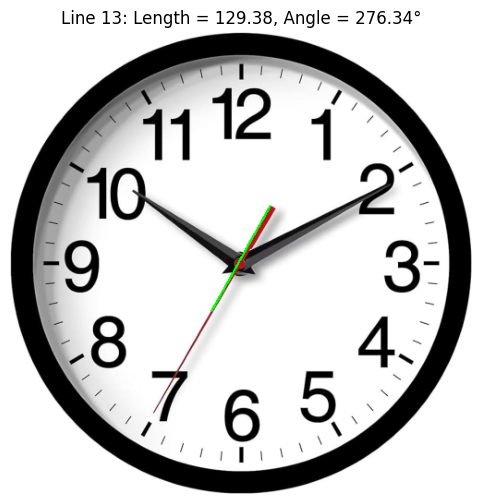

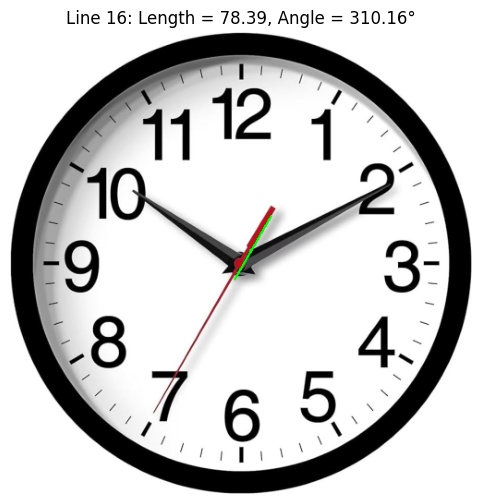

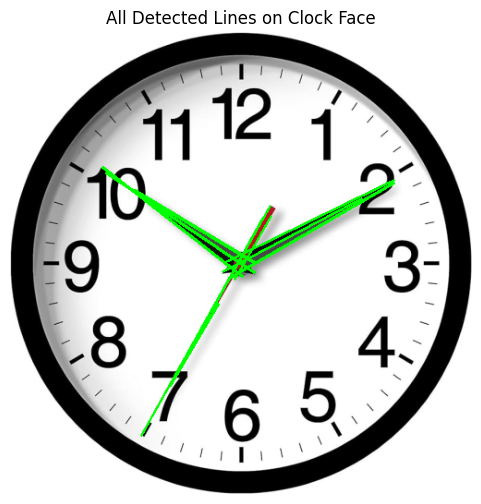

In [94]:


# Assuming 'edges' is the result from the Canny edge detection
# Assuming 'img' is the original image (in BGR format)
# Assuming 'r' is the approximate radius of the clock face
# Assuming 'center' is a tuple (center_x, center_y) representing the clock center

# Example placeholders (replace these with your actual variables)
# edges = cv2.Canny(clock_face, 50, 150, apertureSize=3)
# img = cv2.imread('clock.jpg')  # Replace with your image
# r = 200  # Example radius
# center = (250, 250)  # Example center coordinates

# First Section: Detect lines using the Hough Line Transform
lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi / 180,
    threshold=60,
    minLineLength=0.25 * r,
    maxLineGap=20
)

if lines is not None:
    print(f"{len(lines)} lines detected.")
    
    # Initialize lists to store angles and lengths
    line_data = []

    # Compute angles and lengths for each detected line and display each individually
    for i, line in enumerate(lines):
        x1, y1, x2, y2 = line[0]

        # Compute length of the line
        length = math.hypot(x2 - x1, y2 - y1)

        # Compute the angle of the line (in degrees) relative to the horizontal axis
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2

        # Calculate angle using atan2 with respect to the center
        angle = math.degrees(math.atan2(mid_y - y, mid_x - x))
        if angle < 0:
            angle += 360

        # Append line information (length, angle, line coordinates)
        distance_from_center1 = math.hypot(x1 - x, y1 - y)
        distance_from_center2 = math.hypot(x2 - x, y2 - y)
        distance_from_center = min(distance_from_center1,distance_from_center2)
        if distance_from_center > 0.3 *r :
            continue

        line_data.append({
            'length': length,
            'angle': angle,
            'coords': (x1, y1, x2, y2)
        })

        # Create a copy of the original image to draw each line individually
        img_single_line = img.copy()

        # Draw the line for visualization (green color)
        cv2.line(img_single_line, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display the detected line
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(img_single_line, cv2.COLOR_BGR2RGB))
        plt.title(f'Line {i + 1}: Length = {length:.2f}, Angle = {angle:.2f}°')
        plt.axis('off')
        plt.show()

    # Draw all detected lines on the original image
    img_lines = img.copy()
    for line in line_data:
        x1, y1, x2, y2 = line['coords']
        cv2.line(img_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display all detected lines together on the clock face
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
    plt.title('All Detected Lines on Clock Face')
    plt.axis('off')
    plt.show()

else:
    print("No lines detected.")


In [95]:
print(clock_hands)

NameError: name 'clock_hands' is not defined

11
Cluster 1 - Representative Angle: 332.41°


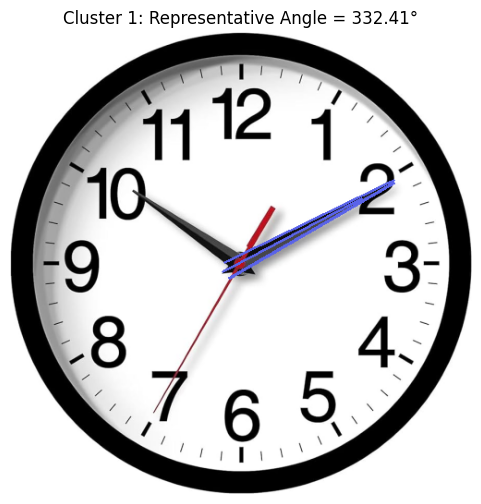

Cluster 2 - Representative Angle: 215.18°


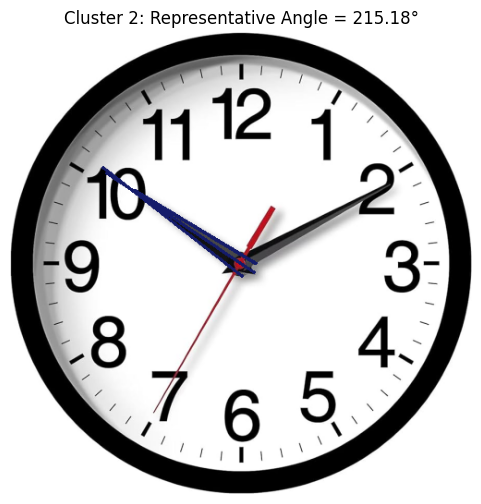

Cluster 3 - Representative Angle: 120.08°


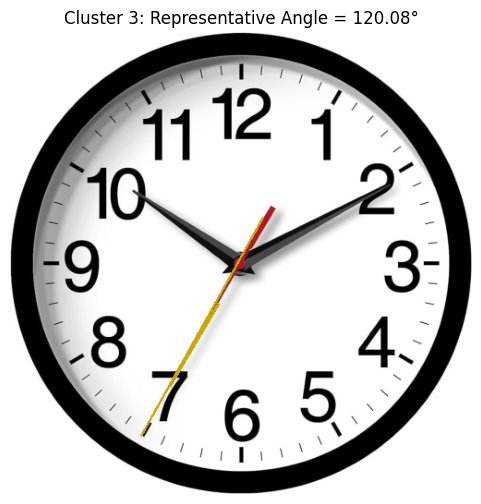

Cluster 4 - Representative Angle: 276.34°


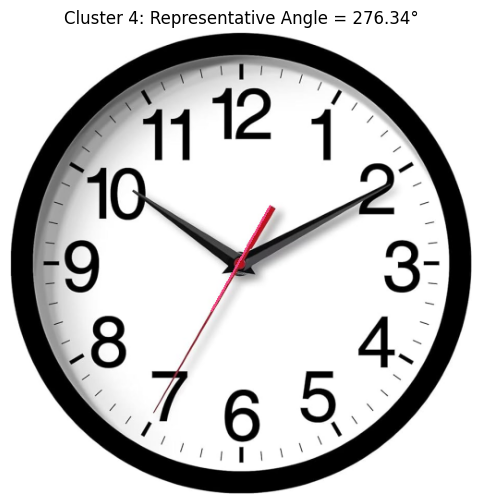

Cluster 5 - Representative Angle: 310.16°


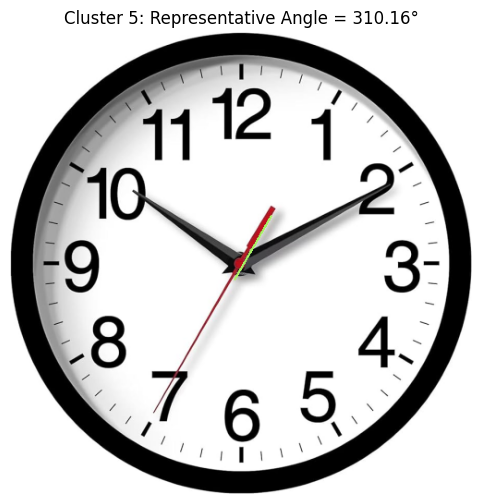

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to cluster lines based on angle similarity
def cluster_lines_by_angle(lines, angle_threshold):
    clusters = []

    for line in lines:
        angle = line['angle']
        added_to_cluster = False

        # Iterate over existing clusters to see if the line fits into one of them
        for cluster in clusters:
            # Calculate the difference between angles, taking into account circular nature (0-360 degrees)
            angle_diff = min(abs(angle - cluster['angle']), 360 - abs(angle - cluster['angle']))
            if angle_diff < angle_threshold:
                # Add the line to the cluster if angle difference is below the threshold
                cluster['lines'].append(line)
                # Update the cluster's representative angle as the mean of all angles in the cluster
                cluster['angle'] = np.mean([l['angle'] for l in cluster['lines']])
                added_to_cluster = True
                break

        # If the line does not fit into any existing cluster, create a new cluster
        if not added_to_cluster:
            clusters.append({'angle': angle, 'lines': [line]})

    return clusters

# Assuming 'line_data' is a list of dictionaries where each dictionary represents a line with the following structure:
# line_data = [{'length': ..., 'angle': ..., 'coords': (x1, y1, x2, y2)}, ...]

angle_threshold = 10  # degrees for clustering similar angles

# Perform clustering on the detected lines
print(len(line_data))
clusters = cluster_lines_by_angle(line_data, angle_threshold)

# Visualize each cluster
for idx, cluster in enumerate(clusters):
    print(f"Cluster {idx + 1} - Representative Angle: {cluster['angle']:.2f}°")

    # Create a copy of the original image to draw lines in this cluster
    img_cluster = img.copy()

    # Define a distinct color for each cluster (randomized for visualization purposes)
    color = tuple(np.random.randint(0, 255, size=3).tolist())

    for line in cluster['lines']:
        x1, y1, x2, y2 = line['coords']
        # Draw the line for visualization
        cv2.line(img_cluster, (x1, y1), (x2, y2), color, 2)

    # Display the clustered lines on the clock face
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_cluster, cv2.COLOR_BGR2RGB))
    plt.title(f'Cluster {idx + 1}: Representative Angle = {cluster["angle"]:.2f}°')
    plt.axis('off')
    plt.show()


In [97]:
representative_lines = []
print(len(clusters))
for cluster in clusters:
    avg_length = sum([i['length'] for i in cluster['lines']]) / len(cluster['lines'])
    avg_angle = sum([i['angle'] for i in cluster['lines']]) / len(cluster['lines'])
    representative_lines.append({'length' : avg_length, 'angle' : avg_angle})
print(representative_lines)


5
[{'length': 192.89293311455484, 'angle': 332.4116656440976}, {'length': 172.65769502620174, 'angle': 215.1776523467579}, {'length': 185.63096155101678, 'angle': 120.08477342038978}, {'length': 129.37542270462347, 'angle': 276.3401917459099}, {'length': 78.39005038906404, 'angle': 310.15599962491933}]


144.8223476532421
hour:  10.172588411558596
2
minute angle :  120.08477342038978
second angle :  332.4116656440976
minute :  35.0141289033983
second :  10.401944274016273
theta_hour_clock : 318.0833333333333


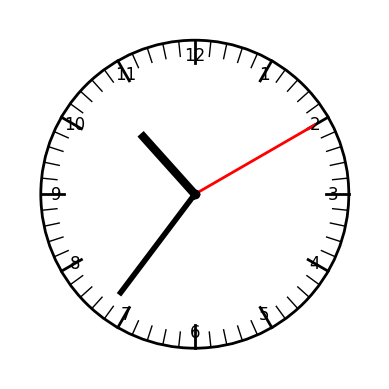

minute angle :  332.4116656440976
second angle :  120.08477342038978
minute :  10.401944274016273
second :  35.0141289033983
theta_hour_clock : 305.2916666666667


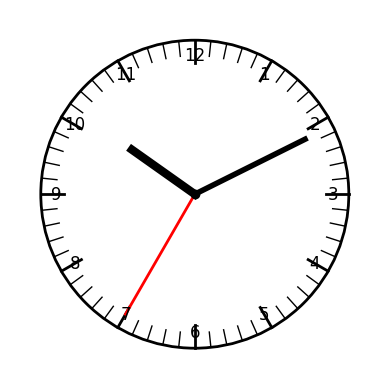

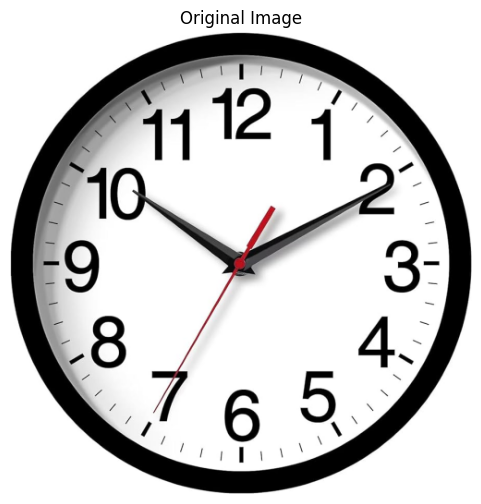

In [98]:
import math
from itertools import permutations, product
import matplotlib.pyplot as plt
import numpy as np


sorted_lines = sorted(representative_lines, key=lambda x: x['length'])
if len(sorted_lines) > 3 :
    sorted_lines = sorted_lines[len(sorted_lines) - 3:]
# print(hour_line)
hour_line = sorted_lines[0]
other_lines = sorted_lines[1:]

# Convert the angle to match the clock face where 0 degrees is at 3 o'clock
# and angles increase counterclockwise
clock_angle = 360 - hour_line['angle'] % 360  # No adjustment needed since 0 degrees is at 3 o'clock
print(clock_angle)
hour = hour_line['angle'] / 30 + 3
print("hour: ",hour_line['angle'] / 30 + 3)
print(len(other_lines))
if len(other_lines) == 2 :
    for perm in list(permutations(other_lines)) :
        minute_line = perm[0]
        second_line = perm[1]
        minute_angle = minute_line['angle'] % 360
        second_angle = second_line['angle'] % 360
        minute = minute_angle / 6 + 15
        second = second_angle / 6 + 15
        minute = minute % 60
        print("minute angle : ",minute_angle)
        print("second angle : ",second_angle)
        print("minute : ",minute)
        print("second : ",second % 60)
        plot_clock(int(hour),int(minute),int(second))
else :
    minute_line = other_lines[0]
    minute_angle = minute_line['angle'] % 360
    minute = minute_angle / 6 + 15
    minute = minute % 60
    print("minute angle : ",minute_angle)
    print("minute : ",minute)
    plot_clock(int(hour),int(minute),0,False)
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clock(hour, minute, second , show_second_hand = True):
    # Adjust hour to be within 12
    hour = hour % 12
    
    # Compute the angles in degrees
    theta_hour_clock = (hour + minute / 60 + second / 3600) * 30  # Each hour is 30 degrees
    theta_minute_clock = (minute + second / 60) * 6  # Each minute is 6 degrees
    theta_second_clock = second * 6  # Each second is 6 degrees
    print("theta_hour_clock :" ,theta_hour_clock)
    # Convert clock angles to unit circle angles
    theta_hour_unit = 90 - theta_hour_clock
    theta_minute_unit = 90 - theta_minute_clock
    theta_second_unit = 90 - theta_second_clock
    
    # Convert to radians
    theta_hour_rad = np.deg2rad(theta_hour_unit)
    theta_minute_rad = np.deg2rad(theta_minute_unit)
    theta_second_rad = np.deg2rad(theta_second_unit)
    
    # Compute hand endpoints
    hour_length = 0.5
    minute_length = 0.8
    second_length = 0.9
    
    x_hour = hour_length * np.cos(theta_hour_rad)
    y_hour = hour_length * np.sin(theta_hour_rad)
    
    x_minute = minute_length * np.cos(theta_minute_rad)
    y_minute = minute_length * np.sin(theta_minute_rad)
    
    x_second = second_length * np.cos(theta_second_rad)
    y_second = second_length * np.sin(theta_second_rad)
    
    # Plot the clock face
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    
    # Draw the outer circle
    circle = plt.Circle((0,0), 1, fill=False, linewidth=2)
    ax.add_artist(circle)
    
    # Draw the hour marks
    for i in range(1,13):
        angle = np.deg2rad(90 - i*30)
        x_text = 0.9 * np.cos(angle)
        y_text = 0.9 * np.sin(angle)
        ax.text(x_text, y_text, str(i), fontsize=12, ha='center', va='center')
        
    # Draw hour and minute ticks
    for i in range(60):
        angle = np.deg2rad(90 - i*6)
        x_outer = np.cos(angle)
        y_outer = np.sin(angle)
        if i % 5 == 0:
            # Hour tick
            x_inner = 0.85 * np.cos(angle)
            y_inner = 0.85 * np.sin(angle)
            ax.plot([x_inner, x_outer], [y_inner, y_outer], color='black', linewidth=2)
        else:
            # Minute tick
            x_inner = 0.9 * np.cos(angle)
            y_inner = 0.9 * np.sin(angle)
            ax.plot([x_inner, x_outer], [y_inner, y_outer], color='black', linewidth=1)
    
    # Draw the hands
    # Hour hand
    ax.plot([0, x_hour], [0, y_hour], color='black', linewidth=6)
    # Minute hand
    ax.plot([0, x_minute], [0, y_minute], color='black', linewidth=4)
    # Second hand
    if(show_second_hand) :
        ax.plot([0, x_second], [0, y_second], color='red', linewidth=2)
    
    # Draw the center point
    ax.plot(0, 0, marker='o', color='black')
    
    # Set limits and remove axes
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axis('off')
    
    plt.show()
# plot_clock(11,11,30)